In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2nd project/PATIW.csv')

In [4]:
dataset

,price,weather,kind,market,corp,wide,city,year,month,area,ratio,amount,inn,out,AT_1,AT_2,AT_3,AT_4,AT_5,AT_6,AT_7,AT_8,AT_9,AT_10,AT_11,AT_12,HT_1,HT_2,HT_3,HT_4,HT_5,HT_6,HT_7,HT_8,HT_9,HT_10,HT_11,HT_12,LT_1,LT_2,LT_3,LT_4,LT_5,LT_6,LT_7,LT_8,LT_9,LT_10,LT_11,LT_12,RAIN_1,RAIN_2,RAIN_3,RAIN_4,RAIN_5,RAIN_6,RAIN_7,RAIN_8,RAIN_9,RAIN_10,RAIN_11,RAIN_12,SUN_1,SUN_2,SUN_3,SUN_4,SUN_5,SUN_6,SUN_7,SUN_8,SUN_9,SUN_10,SUN_11,SUN_12
0,793.00,영천,4,5,23,2,26,21,10,2365,8098,191509,5213.902,7.88,3.3,4.2,8.2,11.3,18.0,23.0,22.0,27.0,19.8,13.8,8.3,0.6,8.7,10.4,15.0,18.5,24.4,29.1,25.8,31.9,25.0,20.6,14.9,7.1,-1.1,-1.5,1.2,3.9,12.0,17.3,18.9,23.3,15.5,8.1,2.2,-5.1,101.3,55.4,21.1,36.5,46.4,142.0,338.5,246.9,201.6,11.1,32.8,0.9,130.5,179.9,224.0,258.5,228.3,217.1,93.8,190.0,140.2,198.3,160.8,172.4
1,843.43,영천,4,5,79,2,26,21,10,2365,8098,191509,5213.902,7.88,3.3,4.2,8.2,11.3,18.0,23.0,22.0,27.0,19.8,13.8,8.3,0.6,8.7,10.4,15.0,18.5,24.4,29.1,25.8,31.9,25.0,20.6,14.9,7.1,-1.1,-1.5,1.2,3.9,12.0,17.3,18.9,23.3,15.5,8.1,2.2,-5.1,101.3,55.4,21.1,36.5,46.4,142.0,338.5,246.9,201.6,11.1,32.8,0.9,130.5,179.9,224.0,258.5,228.3,217.1,93.8,190.0,140.2,198.3,160.8,172.4
2,725.00,영천,0,31,20,2,26,21,10,2365,8098,191509,5213.902,7.88,3.3,4.2,8.2,11.3,18.0,23.0,22.0,27.0,19.8,13.8,8.3,0.6,8.7,10.4,15.0,18.5,24.4,29.1,25.8,31.9,25.0,20.6,14.9,7.1,-1.1,-1.5,1.2,3.9,12.0,17.3,18.9,23.3,15.5,8.1,2.2,-5.1,101.3,55.4,21.1,36.5,46.4,142.0,338.5,246.9,201.6,11.1,32.8,0.9,130.5,179.9,224.0,258.5,228.3,217.1,93.8,190.0,140.2,198.3,160.8,172.4
3,804.59,영천,4,5,23,2,26,21,9,2365,8098,191509,3378.003,2.20,3.3,4.2,8.2,11.3,18.0,23.0,22.0,27.0,19.8,13.8,8.3,0.6,8.7,10.4,15.0,18.5,24.4,29.1,25.8,31.9,25.0,20.6,14.9,7.1,-1.1,-1.5,1.2,3.9,12.0,17.3,18.9,23.3,15.5,8.1,2.2,-5.1,101.3,55.4,21.1,36.5,46.4,142.0,338.5,246.9,201.6,11.1,32.8,0.9,130.5,179.9,224.0,258.5,228.3,217.1,93.8,190.0,140.2,198.3,160.8,172.4
4,890.58,영천,4,5,79,2,26,21,9,2365,8098,191509,3378.003,2.20,3.3,4.2,8.2,11.3,18.0,23.0,22.0,27.0,19.8,13.8,8.3,0.6,8.7,10.4,15.0,18.5,24.4,29.1,25.8,31.9,25.0,20.6,14.9,7.1,-1.1,-1.5,1.2,3.9,12.0,17.3,18.9,23.3,15.5,8.1,2.2,-5.1,101.3,55.4,21.1,36.5,46.4,142.0,338.5,246.9,201.6,11.1,32.8,0.9,130.5,179.9,224.0,258.5,228.3,217.1,93.8,190.0,140.2,198.3,160.8,172.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23786,819.59,여수,8,5,23,6,22,17,5,9521,5981,569472,943.504,833.01,2.5,4.3,9.0,14.5,18.9,21.9,25.3,27.7,23.0,18.3,11.4,6.4,5.9,8.6,12.9,18.2,22.8,24.4,27.8,31.3,25.5,21.0,14.9,10.2,-0.1,0.8,5.7,11.6,15.6,19.9,23.4,24.9,21.1,16.0,8.2,3.1,51.2,65.5,86.6,301.0,124.3,162.2,157.8,33.8,317.2,150.0,77.7,89.3,183.3,221.0,220.2,192.1,247.5,152.8,221.2,301.2,130.8,126.1,182.2,193.2
23787,872.83,서귀포,0,11,1,8,18,17,5,1566,6458,101134,943.504,833.01,6.2,7.4,11.1,15.8,18.9,21.7,25.8,27.7,23.7,20.4,14.6,10.4,9.3,10.9,14.6,19.4,22.1,24.3,28.1,30.7,26.4,23.2,17.9,13.9,3.4,4.2,7.7,12.9,15.9,19.5,24.0,25.1,21.4,18.2,11.6,7.2,74.9,143.4,138.1,232.2,216.6,281.2,203.2,170.9,194.3,433.6,44.6,71.5,115.2,173.8,205.5,180.6,189.1,110.9,176.7,282.7,126.0,97.9,155.1,162.5
23788,731.67,서귀포,7,10,30,8,18,17,5,1566,6458,101134,943.504,833.01,6.2,7.4,11.1,15.8,18.9,21.7,25.8,27.7,23.7,20.4,14.6,10.4,9.3,10.9,14.6,19.4,22.1,24.3,28.1,30.7,26.4,23.2,17.9,13.9,3.4,4.2,7.7,12.9,15.9,19.5,24.0,25.1,21.4,18.2,11.6,7.2,74.9,143.4,138.1,232.2,216.6,281.2,203.2,170.9,194.3,433.6,44.6,71.5,115.2,173.8,205.5,180.6,189.1,110.9,176.7,282.7,126.0,97.9,155.1,162.5
23789,774.76,서귀포,8,10,75,8,18,17,5,1566,6458,101134,943.504,833.01,6.2,7.4,11.1,15.8,18.9,21.7,25.8,27.7,23.7,20.4,14.6,10.4,9.3,10.9,14.6,19.4,22.1,24.3,28.1,30.7,26.4,23.2,17.9,13.9,3.4,4.2,7.7,12.9,15.9,19.5,24.0,25.1,21.4,18.2,11.6,7.2,74.9,143.4,138.1,232.2,216.6,281.2,203.2,170.9,194.3,433.6,44.6,71.5,115.2

# I. Amount와 Weather 제거

In [5]:
# 거래환경에 영향을 주는 변수(month, city, market, corp, wide, year, inn, out)만의 모델링
dataset_deal = dataset[['price', 'kind', 'market', 'corp', 'wide', 'city', 'year', 'month', 'inn', 'out']]

## (1) Multivariate Regression

In [6]:
from sklearn.model_selection import train_test_split

X = dataset_deal.iloc[:, 1:]
y = dataset_deal.iloc[:, 0]

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 2045)

print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

Train Data :  (16653, 9) (16653,)
Test Data :  (7138, 9) (7138,)


* normalize = True로 한 이후에 mse와 nmae 안 좋아짐

In [ ]:
from sklearn.linear_model import LinearRegression

MR = LinearRegression(normalize = True, n_jobs = -1)
MR.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=True)

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

mse = mean_squared_error(y_test, MR.predict(X_test))
np.sqrt(mse)

322.5097331763925

In [ ]:
from sklearn.metrics import mean_absolute_error
import numpy as np
mae = mean_absolute_error(y_test, MR.predict(X_test))
norm=(abs(y_test).sum())/len(y_test)
nmae=mae/norm
print('nmae:', nmae)

nmae: 0.3643838125921227


## (2) Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge

RG = Ridge(normalize = True, 
           alpha = 0.3,
           solver = 'cholesky',
           random_state = 2045)   

RG.fit(X_train, y_train)

Ridge(alpha=0.3, copy_X=True, fit_intercept=True, max_iter=None, normalize=True,
      random_state=2045, solver='cholesky', tol=0.001)

* 제약조건이 있어서 그런가 test에서는 더 향상되지 않음

In [ ]:
mse = mean_squared_error(y_test, RG.predict(X_test))
np.sqrt(mse)

323.20851973573684

In [ ]:
from sklearn.metrics import mean_absolute_error
import numpy as np
mae = mean_absolute_error(y_test, RG.predict(X_test))
norm=(abs(y_test).sum())/len(y_test)
nmae=mae/norm
print('nmae:', nmae)

nmae: 0.3630257326696481


## (3) Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso

LS = Lasso(normalize = True, 
           alpha = 0.2, random_state = 2045)
   
LS.fit(X_train, y_train)

Lasso(alpha=0.2, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True,
      positive=False, precompute=False, random_state=2045, selection='cyclic',
      tol=0.0001, warm_start=False)

In [ ]:
mse = mean_squared_error(y_test, LS.predict(X_test))
np.sqrt(mse)

327.07662785441437

In [ ]:
from sklearn.metrics import mean_absolute_error
import numpy as np
mae = mean_absolute_error(y_test, LS.predict(X_test))
norm=(abs(y_test).sum())/len(y_test)
nmae=mae/norm
print('nmae:', nmae)

nmae: 0.3653901093201664


## (4) ElasticNet Regression

In [ ]:
from sklearn.linear_model import ElasticNet

EN = ElasticNet(normalize = True, 
                alpha = 0.001,
                l1_ratio = 0.7, random_state = 2045)
   
EN.fit(X_train, y_train)

ElasticNet(alpha=0.001, copy_X=True, fit_intercept=True, l1_ratio=0.7,
           max_iter=1000, normalize=True, positive=False, precompute=False,
           random_state=2045, selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
mse = mean_squared_error(y_test, EN.predict(X_test))
np.sqrt(mse)

335.15868639851976

In [ ]:
mae = mean_absolute_error(y_test, EN.predict(X_test))
norm=(abs(y_test).sum())/len(y_test)
nmae=mae/norm
print('nmae:', nmae)

nmae: 0.37109892476640566


## (5) Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

DTR = DecisionTreeRegressor(max_depth = 5,
                            criterion ='mse',
                            random_state = 2045)

DTR.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=2045, splitter='best')

* multivariate regression의 normalize 안 준 값보다 좋아짐

In [ ]:
mse = mean_squared_error(y_test, DTR.predict(X_test))
np.sqrt(mse)

200.68493875202458

In [ ]:
mae = mean_absolute_error(y_test, DTR.predict(X_test))
norm=(abs(y_test).sum())/len(y_test)
nmae=mae/norm
print('nmae:', nmae)

nmae: 0.20582146381965205


In [ ]:
DTR.feature_importances_

array([1.22064372e-02, 5.14274932e-03, 0.00000000e+00, 7.22182623e-03,
       1.66221294e-04, 5.22293354e-01, 3.53789202e-01, 1.38590645e-02,
       8.53211455e-02])

* kind, year, month, ratio, inn, out, rain_12, sun_10, sun_12

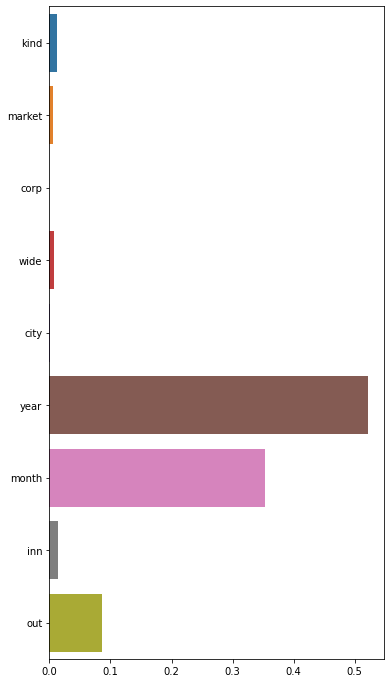

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (6, 12))
sns.barplot(DTR.feature_importances_, dataset_deal.iloc[:, 1:].columns)
plt.show()

In [ ]:
dataset_deal.iloc[:, 1:].columns

Index(['kind', 'market', 'corp', 'wide', 'city', 'year', 'month', 'inn',
       'out'],
      dtype='object')

### (1)-1. Multivariate Regression

* decision tree의 feature importance를 반영

In [ ]:
from sklearn.model_selection import train_test_split

Xd = dataset_deal[['year', 'month', 'out']]
yd = dataset_deal.iloc[:, 0]

Xd_train, Xd_test, yd_train, yd_test = train_test_split(Xd, yd,
                                                    test_size = 0.3,
                                                    random_state = 2045)

print('Train Data : ', Xd_train.shape, yd_train.shape)
print('Test Data : ', Xd_test.shape, yd_test.shape)

Train Data :  (16653, 3) (16653,)
Test Data :  (7138, 3) (7138,)


In [ ]:
MRd = LinearRegression()
MRd.fit(Xd_train, yd_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

* 변수를 줄였으니 당연히? test에 대해서는 좋아지지 않음 

In [ ]:
mse = mean_squared_error(yd_test, MRd.predict(Xd_test))
np.sqrt(mse)

324.43305407168253

## (6) Random Forest Regressor

In [25]:
from sklearn.ensemble import RandomForestRegressor

RFR = RandomForestRegressor(n_estimators = 2000,
                            max_depth = 5,
                            criterion ='mse',
                            n_jobs = -1,
                            random_state = 2045)

RFR.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=2000, n_jobs=-1, oob_score=False,
                      random_state=2045, verbose=0, warm_start=False)

* multivariate regression 보다는 향상되었으나
* decision tree 보다는 낮아짐 
* max_feature를 제한해서 그럴 수도 있음

In [26]:
from sklearn.metrics import mean_squared_error
import numpy as np

mse = mean_squared_error(y_test, RFR.predict(X_test))
np.sqrt(mse)

197.31304251915336

In [27]:
from sklearn.metrics import mean_absolute_error
import numpy as np
mae = mean_absolute_error(y_test, RFR.predict(X_test))
norm=(abs(y_test).sum())/len(y_test)
nmae=mae/norm
print('nmae:', nmae)

nmae: 0.2018839987950442


# II. Amount와 Weather만 

In [15]:
# 월별 거래금액에 영향을 주는 변수(month, city, market, corp, wide, year, inn, out) 제외하여, 생산량 변수(생산량, 기후)만의 모델링
dataset_climate = dataset[['price', 'area', 'ratio', 'AT_1','AT_2','AT_3','AT_4','AT_5','AT_6','AT_7','AT_8','AT_9','AT_10','AT_11', 'AT_12','HT_1', 'HT_1','HT_2','HT_3','HT_4','HT_5','HT_6','HT_7','HT_8','HT_9','HT_10','HT_11', 'HT_12','LT_1', 'LT_1','LT_2','LT_3','LT_4','LT_5','LT_6','LT_7','LT_8','LT_9','LT_10','LT_11', 'LT_12', 'RAIN_1', 'RAIN_1','RAIN_2','RAIN_3','RAIN_4','RAIN_5','RAIN_6','RAIN_7','RAIN_8','RAIN_9','RAIN_10','RAIN_11', 'RAIN_12','SUN_1', 'SUN_1','SUN_2','SUN_3','SUN_4','SUN_5','SUN_6','SUN_7','SUN_8','SUN_9','SUN_10','SUN_11', 'SUN_12']]

## (1) Multivariate Regression

In [16]:
from sklearn.model_selection import train_test_split

Xc = dataset_climate.iloc[:, 1:]
yc = dataset_climate.iloc[:, 0]

Xc_train, Xc_test, yc_train, yc_test = train_test_split(Xc, yc,
                                                    test_size = 0.3,
                                                    random_state = 2045)

print('Train Data : ', Xc_train.shape, yc_train.shape)
print('Test Data : ', Xc_test.shape, yc_test.shape)

Train Data :  (16653, 66) (16653,)
Test Data :  (7138, 66) (7138,)


* normalize = True로 한 이후에 mse와 nmae 안 좋아짐

In [ ]:
from sklearn.linear_model import LinearRegression

MR = LinearRegression(normalize = True, n_jobs = -1)
MR.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=True)

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

mse = mean_squared_error(y_test, MR.predict(X_test))
np.sqrt(mse)

281.8538084786324

In [ ]:
from sklearn.metrics import mean_absolute_error
import numpy as np
mae = mean_absolute_error(y_test, MR.predict(X_test))
norm=(abs(y_test).sum())/len(y_test)
nmae=mae/norm
print('nmae:', nmae)

nmae: 0.3011346582657694


## (2) Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge

RG = Ridge(normalize = True, 
           alpha = 0.3,
           solver = 'cholesky',
           random_state = 2045)   

RG.fit(X_train, y_train)

Ridge(alpha=0.3, copy_X=True, fit_intercept=True, max_iter=None, normalize=True,
      random_state=2045, solver='cholesky', tol=0.001)

* 제약조건이 있어서 그런가 test에서는 더 향상되지 않음

In [ ]:
mse = mean_squared_error(y_test, RG.predict(X_test))
np.sqrt(mse)

285.18585932031147

In [ ]:
from sklearn.metrics import mean_absolute_error
import numpy as np
mae = mean_absolute_error(y_test, RG.predict(X_test))
norm=(abs(y_test).sum())/len(y_test)
nmae=mae/norm
print('nmae:', nmae)

nmae: 0.30491503114826185


## (3) Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso

LS = Lasso(normalize = True, 
           alpha = 0.2, random_state = 2045)
   
LS.fit(X_train, y_train)

Lasso(alpha=0.2, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True,
      positive=False, precompute=False, random_state=2045, selection='cyclic',
      tol=0.0001, warm_start=False)

In [ ]:
mse = mean_squared_error(y_test, LS.predict(X_test))
np.sqrt(mse)

293.87391585510346

In [ ]:
from sklearn.metrics import mean_absolute_error
import numpy as np
mae = mean_absolute_error(y_test, LS.predict(X_test))
norm=(abs(y_test).sum())/len(y_test)
nmae=mae/norm
print('nmae:', nmae)

nmae: 0.3197840496420102


## (4) ElasticNet Regression

In [ ]:
from sklearn.linear_model import ElasticNet

EN = ElasticNet(normalize = True, 
                alpha = 0.001,
                l1_ratio = 0.7, random_state = 2045)
   
EN.fit(X_train, y_train)

ElasticNet(alpha=0.001, copy_X=True, fit_intercept=True, l1_ratio=0.7,
           max_iter=1000, normalize=True, positive=False, precompute=False,
           random_state=2045, selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
mse = mean_squared_error(y_test, EN.predict(X_test))
np.sqrt(mse)

299.74718078823673

In [ ]:
mae = mean_absolute_error(y_test, EN.predict(X_test))
norm=(abs(y_test).sum())/len(y_test)
nmae=mae/norm
print('nmae:', nmae)

nmae: 0.3256473217416817


## (5) Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

DTR = DecisionTreeRegressor(max_depth = 5,
                            criterion ='mse',
                            random_state = 2045)

DTR.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=2045, splitter='best')

* multivariate regression의 normalize 안 준 값보다 좋아짐

In [ ]:
mse = mean_squared_error(y_test, DTR.predict(X_test))
np.sqrt(mse)

281.41892933813796

In [ ]:
mae = mean_absolute_error(y_test, DTR.predict(X_test))
norm=(abs(y_test).sum())/len(y_test)
nmae=mae/norm
print('nmae:', nmae)

nmae: 0.29801827580907597


In [ ]:
DTR.feature_importances_

array([1.47186506e-04, 4.07050795e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.59689124e-02, 0.00000000e+00,
       6.54700910e-01, 0.00000000e+00, 0.00000000e+00, 6.51893636e-02,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.00706588e-03,
       4.38917779e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       9.02486430e-04, 8.81959930e-04, 0.00000000e+00, 0.00000000e+00,
       3.58862710e-04, 0.00000000e+00, 0.00000000e+00, 5.24634667e-05,
       0.00000000e+00, 2.05806235e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 7.33040628e-03, 1.52635982e-02, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.51298178e-03, 0.00000000e+00,
       2.66651129e-02, 0.00000000e+00, 1.98987910e-02, 0.00000000e+00,
       7.08576434e-03, 4.67298161e-02, 0.00000000e+00, 7.52669476e-02,
      

* kind, year, month, ratio, inn, out, rain_12, sun_10, sun_12

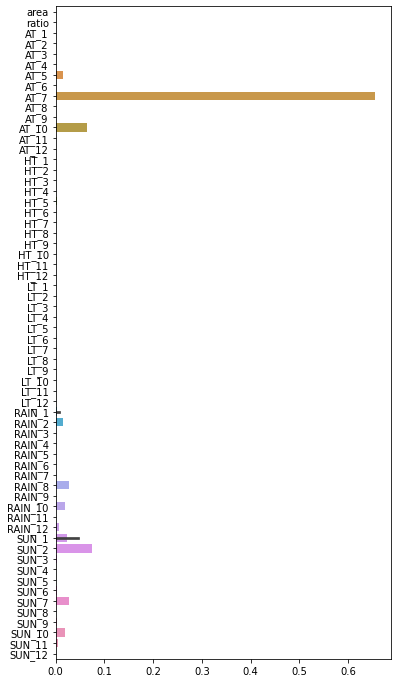

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (6, 12))
sns.barplot(DTR.feature_importances_, dataset_climate.iloc[:, 1:].columns)
plt.show()

In [ ]:
dataset_climate.iloc[:, 2:].columns

Index(['ratio', 'AT_1', 'AT_2', 'AT_3', 'AT_4', 'AT_5', 'AT_6', 'AT_7', 'AT_8',
       'AT_9', 'AT_10', 'AT_11', 'AT_12', 'HT_1', 'HT_1', 'HT_2', 'HT_3',
       'HT_4', 'HT_5', 'HT_6', 'HT_7', 'HT_8', 'HT_9', 'HT_10', 'HT_11',
       'HT_12', 'LT_1', 'LT_1', 'LT_2', 'LT_3', 'LT_4', 'LT_5', 'LT_6', 'LT_7',
       'LT_8', 'LT_9', 'LT_10', 'LT_11', 'LT_12', 'RAIN_1', 'RAIN_1', 'RAIN_2',
       'RAIN_3', 'RAIN_4', 'RAIN_5', 'RAIN_6', 'RAIN_7', 'RAIN_8', 'RAIN_9',
       'RAIN_10', 'RAIN_11', 'RAIN_12', 'SUN_1', 'SUN_1', 'SUN_2', 'SUN_3',
       'SUN_4', 'SUN_5', 'SUN_6', 'SUN_7', 'SUN_8', 'SUN_9', 'SUN_10',
       'SUN_11', 'SUN_12'],
      dtype='object')

### (1)-1. Multivariate Regression

* decision tree의 feature importance를 반영

In [ ]:
from sklearn.model_selection import train_test_split

Xd = dataset_climate[['AT_5', 'AT_7', 'AT_10', 'RAIN_2', 'RAIN_8', 'RAIN_10', 'SUN_1', 'SUN_2', 'SUN_7', 'SUN_10']]
yd = dataset_climate.iloc[:, 0]

Xd_train, Xd_test, yd_train, yd_test = train_test_split(Xd, yd,
                                                    test_size = 0.3,
                                                    random_state = 2045)

print('Train Data : ', Xd_train.shape, yd_train.shape)
print('Test Data : ', Xd_test.shape, yd_test.shape)

Train Data :  (16653, 11) (16653,)
Test Data :  (7138, 11) (7138,)


In [ ]:
MRd = LinearRegression()
MRd.fit(Xd_train, yd_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

* 변수를 줄였으니 당연히? test에 대해서는 좋아지지 않음 

In [ ]:
mse = mean_squared_error(yd_test, MRd.predict(Xd_test))
np.sqrt(mse)

288.9116369637517

In [ ]:
mae = mean_absolute_error(yd_test, MRd.predict(Xd_test))
norm=(abs(yd_test).sum())/len(yd_test)
nmae=mae/norm
print('nmae:', nmae)

nmae: 0.31247024069245033


## (6) Random Forest Regressor

In [17]:
from sklearn.ensemble import RandomForestRegressor

RFR = RandomForestRegressor(n_estimators = 2000,
                            max_depth = 5,
                            criterion ='mse',
                            n_jobs = -1,
                            random_state = 2045)

RFR.fit(Xc_train, yc_train)           # 2분 6초

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=2000, n_jobs=-1, oob_score=False,
                      random_state=2045, verbose=0, warm_start=False)

* multivariate regression 보다는 향상되었으나
* decision tree 보다는 낮아짐 
* max_feature를 제한해서 그럴 수도 있음

In [18]:
mse = mean_squared_error(yc_test, RFR.predict(Xc_test))
np.sqrt(mse)

279.69116221815693

In [24]:
mae = mean_absolute_error(yc_test, RFR.predict(Xc_test))
norm=(abs(yc_test).sum())/len(yc_test)
nmae=mae/norm
print('nmae:', nmae)

nmae: 0.29803956337893384
